In [1]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [35]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


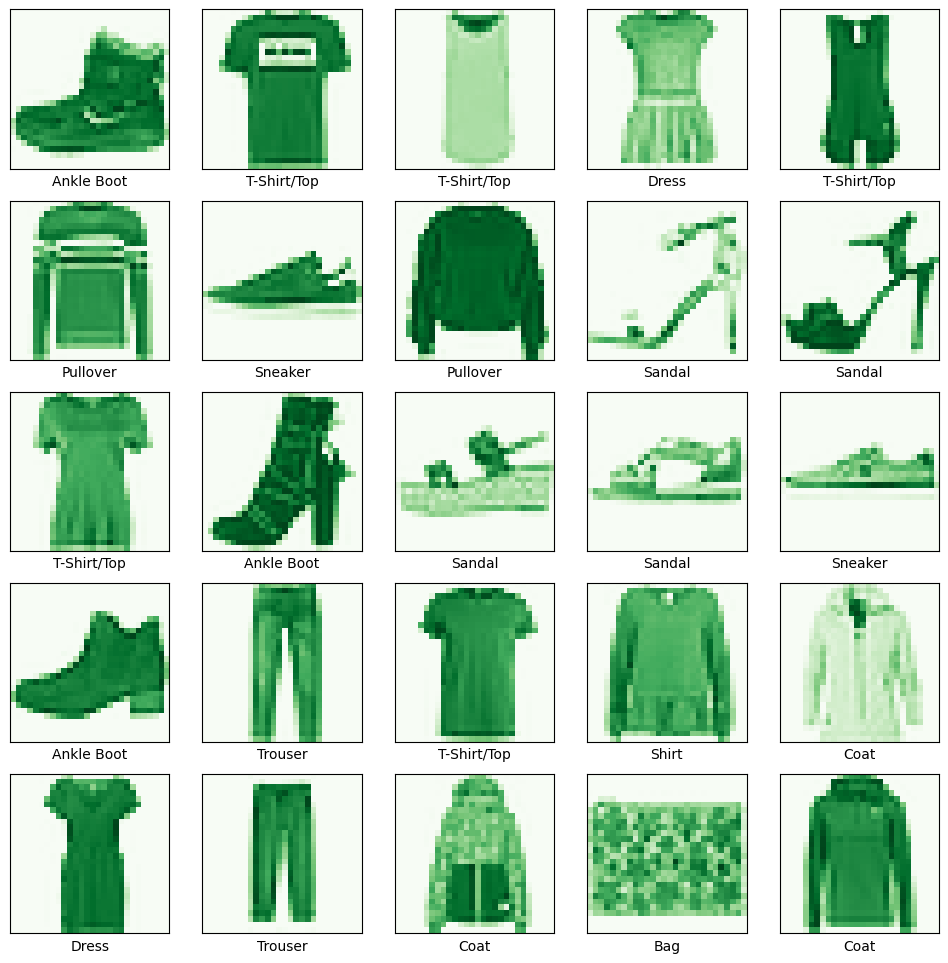

In [34]:
class_names = ["T-Shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

import matplotlib.pyplot as plt

display = plt.figure(figsize=(12, 12))

for i in range(25):
    ax = display.add_subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='Greens')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(class_names[train_labels[i]])

plt.show()



In [3]:
# One hot encoding
train_labels_onehot = tf.keras.utils.to_categorical(train_labels)
test_labels_onehot = tf.keras.utils.to_categorical(test_labels)

print(train_labels_onehot[0])
print(test_labels_onehot[0])



[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [7]:
import keras
from keras import layers
from keras import ops

model = keras.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Lambda(lambda x: x / 255.0))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(156, activation='relu'))
model.add(layers.Dense(10, activation="softmax"))

model.compile(optimizer=tf.keras.optimizers.Adam(), loss="categorical_crossentropy", metrics=["categorical_accuracy"])



C:\Users\lilyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# DO NOT RUN THIS MORE THAN ONCE
history = model.fit(x=train_images, y=train_labels_onehot, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.7546 - loss: 0.6871 - val_categorical_accuracy: 0.8448 - val_loss: 0.4244
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.8609 - loss: 0.3852 - val_categorical_accuracy: 0.8551 - val_loss: 0.3847
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.8722 - loss: 0.3490 - val_categorical_accuracy: 0.8667 - val_loss: 0.3610
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.8809 - loss: 0.3217 - val_categorical_accuracy: 0.8730 - val_loss: 0.3556
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.8858 - loss: 0.3053 - val_categorical_accuracy: 0.8796 - val_loss: 0.3316
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.8927 - loss: 0.2890 - val_categorical_accuracy: 0.8830 - val_loss: 0.3340
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy

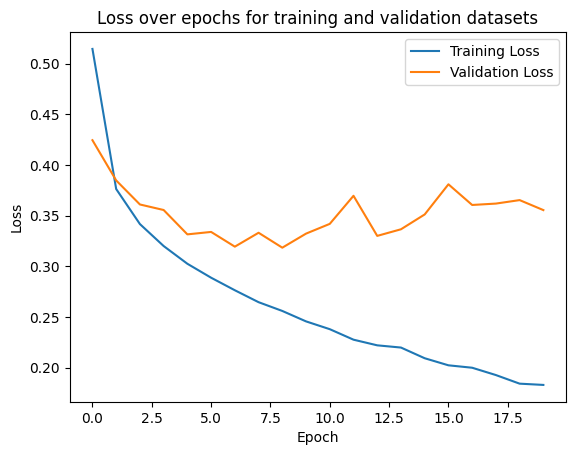

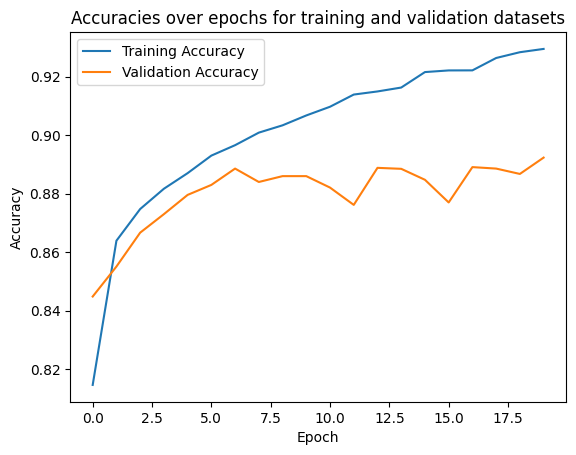

In [11]:
import matplotlib.pyplot as plt
# plot the losses
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Loss over epochs for training and validation datasets")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# plot the accuraccies
plt.plot(history.history['categorical_accuracy'], label="Training Accuracy")
plt.plot(history.history['val_categorical_accuracy'], label="Validation Accuracy")
plt.title("Accuracies over epochs for training and validation datasets")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [13]:
import numpy as np

# generate the model's predictions for testing data
predictions = model.predict(test_images)

converted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [19]:
# accuracy of predictions
accuracy = np.mean(test_labels == converted_labels)
print(accuracy)

0.886


In [22]:
# classification report
import sklearn.metrics

print(sklearn.metrics.classification_report(test_labels, converted_labels))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.98      0.97      0.98      1000
           2       0.75      0.85      0.80      1000
           3       0.91      0.86      0.89      1000
           4       0.79      0.83      0.81      1000
           5       0.99      0.96      0.97      1000
           6       0.76      0.64      0.69      1000
           7       0.94      0.97      0.95      1000
           8       0.96      0.97      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



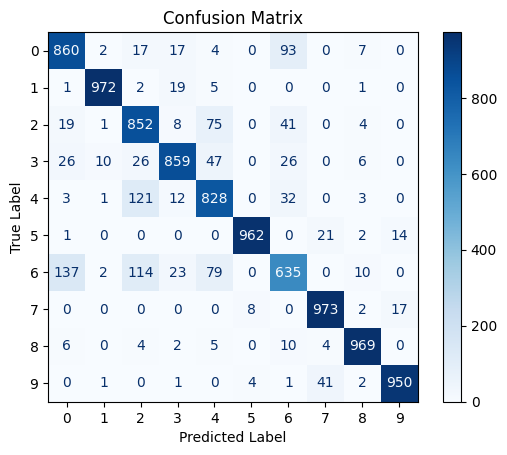

In [23]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confus_matrix = confusion_matrix(test_labels,converted_labels)
matrix_show = ConfusionMatrixDisplay(confusion_matrix=confus_matrix)
matrix_show.plot(cmap='Blues')
matrix_show.ax_.set_title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()